In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

## Convert .jpeg to array

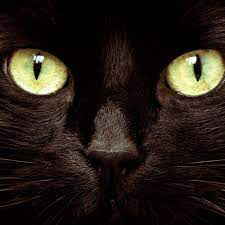

In [2]:
img = Image.open("cat.jpeg")
pix = np.asarray(img)
dim = img.size
img

## Get Average RGB Value

In [3]:
r_list = list()
g_list = list()
b_list = list()
for i in pix:
    for rgb in i:
        r_list.append(rgb[0])
        g_list.append(rgb[1])
        b_list.append(rgb[2])
r_avg = round(sum(r_list)/len(r_list))
g_avg = round(sum(g_list)/len(g_list))
b_avg = round(sum(b_list)/len(b_list))
r_avg, g_avg, b_avg

(37, 28, 22)

## Display Average Color

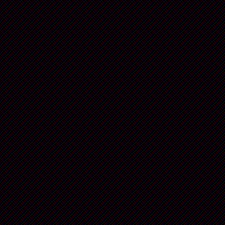

In [4]:
arr_horizontal = [[r_avg, g_avg, b_avg] for i in range(dim[0])]
avg_pix = np.array([arr_horizontal for i in range(dim[1])])
avg_img = Image.fromarray(avg_pix, "RGB")
avg_img

## Get Average Delta

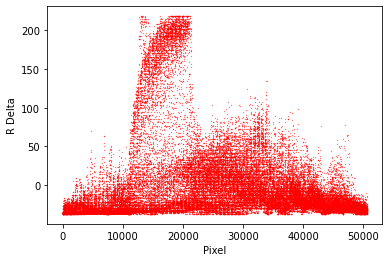

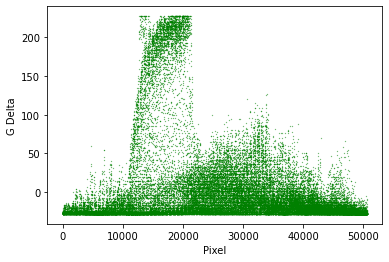

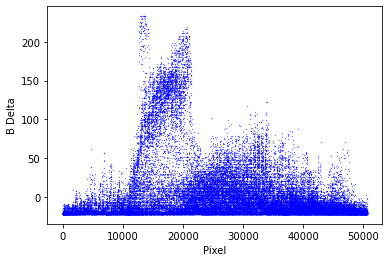

In [5]:
r_delta = list()
g_delta = list()
b_delta = list()
for i in pix:
    for rgb in i:
        r_delta.append(rgb[0]-r_avg)
        g_delta.append(rgb[1]-g_avg)
        b_delta.append(rgb[2]-b_avg)
x_axis = [i for i in range(1, dim[0]*dim[1]+1)]
plt.scatter(x_axis, r_delta, color="red", s=0.05)
plt.xlabel("Pixel")
plt.ylabel("R Delta")
plt.show()
plt.scatter(x_axis, g_delta, color="green", s=0.05)
plt.xlabel("Pixel")
plt.ylabel("G Delta")
plt.show()
plt.scatter(x_axis, b_delta, color="blue", s=0.05)
plt.xlabel("Pixel")
plt.ylabel("B Delta")
plt.show()

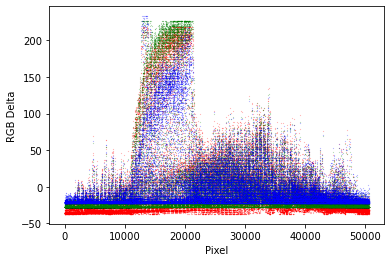

In [6]:
plt.scatter(x_axis, r_delta, color="red", s=0.01)
plt.scatter(x_axis, g_delta, color="green", s=0.01)
plt.scatter(x_axis, b_delta, color="blue", s=0.01)
plt.xlabel("Pixel")
plt.ylabel("RGB Delta")
plt.show()

### From the graph above, certain pixels have high delta values. Grouping algorithm can be applied to normalize pixels in tolerance delta values.

## Tolerance Value Testing

In [11]:
r_tolerance, g_tolerance, b_tolerance = 10, 10, 10

#list of base rgb values
base_rgb_arr = list()

#key: base rgb list
#value: index of pixels that fall under the tolerance of base rgb list
sorted_rgb_dict = dict()


for i in pix:
    for rgb in i:
        tolerance_withstandability=False
        #if the base_rgb_arr is empty, append the rgb value
        if len(base_rgb_arr) == 0:
            base_rgb_arr.append(rgb)
            sorted_rgb_dict[str(rgb)] = [[pix.index(i), i.index(rgb)]]
        else:
            for k in range(len(base_rgb_arr)):
                #if delta is under tolerance, add index to the corresponding key in sorted_rgb_dict
                if abs(rgb[0] - base_rgb_arr[k][0]) <=r_tolerance and abs(rgb[1] - base_rgb_arr[k][0]) <=g_tolerance and abs(rgb[2] - base_rgb_arr[k][2]) <= b_tolerance:
                    sorted_rgb_dict[str(base_rgb_arr[k])].append([pix.index(i), i.index(rgb)])
                    tolerance_withstandability=True
                    break
            #if delta is not under tolerance, add the rgb value to the base_rgb_arr
            if tolerance_withstandability==False:
                base_rgb_arr.append(rgb)
                sorted_rgb_dict[str(rgb)]=[[pix.index(i), i.index(rgb)]]

print(sorted_rgb_dict)

{'[0, 1, 0]': [[0, 0], [0, 0], [0, 0], [0, 0], [0, 4], [0, 4], [0, 4], [0, 7], [0, 7], [0, 7], [0, 7], [0, 7], [0, 7], [0, 7], [0, 7], [0, 7], [0, 16], [0, 16], [0, 16], [0, 16], [0, 16], [0, 16], [0, 16], [0, 16], [0, 24], [0, 24], [0, 24], [0, 24], [0, 24], [0, 24], [0, 24], [0, 24], [0, 32], [0, 32], [0, 32], [0, 32], [0, 32], [0, 32], [0, 32], [0, 32], [0, 40], [0, 40], [0, 40], [0, 40], [0, 40], [0, 40], [0, 40], [0, 40], [0, 50], [0, 51], [0, 51], [0, 53], [0, 54], [0, 55], [0, 56], [0, 56], [0, 56], [0, 59], [0, 59], [0, 59], [0, 62], [0, 62], [0, 64], [0, 64], [0, 59], [0, 59], [0, 68], [0, 68], [0, 68], [0, 68], [0, 59], [0, 59], [0, 59], [0, 59], [0, 59], [0, 59], [0, 59], [0, 59], [0, 59], [0, 59], [0, 59], [0, 59], [0, 59], [0, 59], [0, 59], [0, 59], [0, 59], [0, 59], [0, 59], [0, 59], [0, 59], [0, 59], [0, 59], [0, 59], [0, 59], [0, 59], [0, 59], [0, 59], [0, 59], [0, 59], [0, 59], [0, 59], [0, 64], [0, 64], [0, 59], [0, 59], [0, 68], [0, 68], [0, 68], [0, 68], [0, 59], [0